In [6]:
import pandas as pd
import seaborn as sn

cDF = pd.read_csv('SAheart.csv')
cDF.shape
cDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    object 
dtypes: float64(5), int64(3), object(2)
memory usage: 36.2+ KB


In [4]:
cDF.head(10)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Si
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Si
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,No
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Si
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Si
5,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,No
6,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,No
7,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,Si
8,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,No
9,132,0.00,5.80,30.96,Present,69,30.11,0.00,53,Si


<Axes: xlabel='famhist', ylabel='count'>

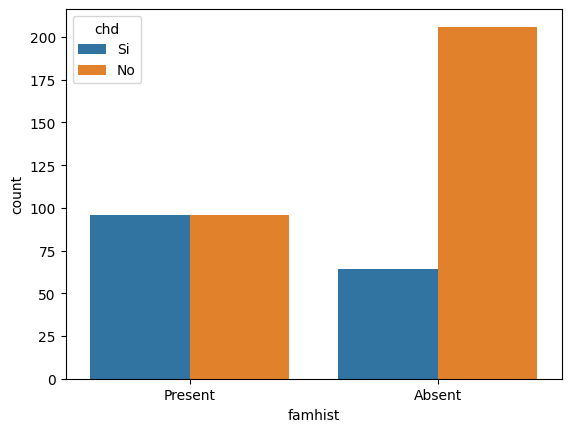

In [15]:
sn.countplot(data=cDF, x='famhist', hue='chd')

<Axes: xlabel='age', ylabel='sbp'>

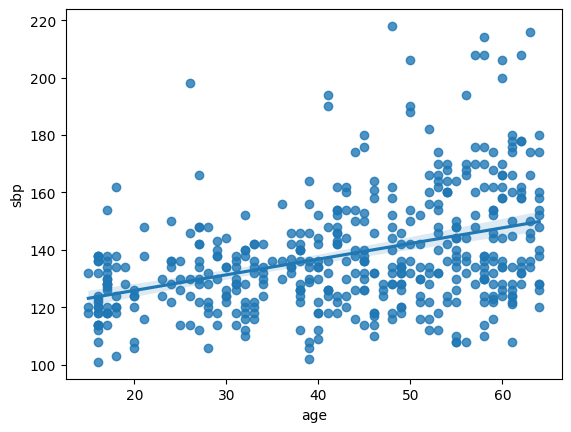

In [18]:
cDF['age'].corr(cDF['sbp'])
sn.regplot(data=cDF, x='age', y='sbp')

<Axes: xlabel='tobacco', ylabel='Density'>

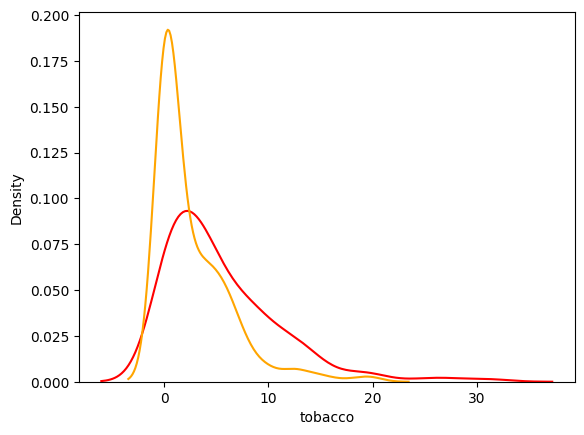

In [22]:
chd = cDF[cDF['chd']=='Si']
nonChd = cDF[cDF['chd']=='No']
sn.kdeplot(chd['tobacco'],color='red')
sn.kdeplot(nonChd['tobacco'],color='orange')


<Axes: >

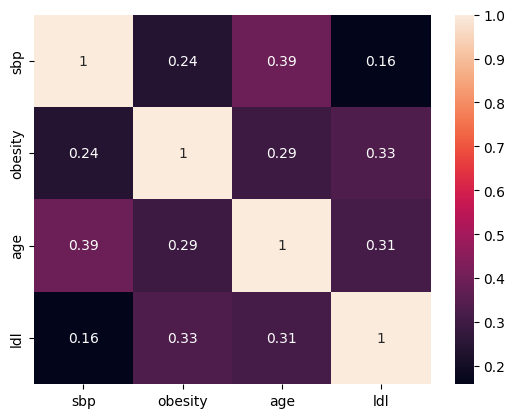

In [25]:
corr_cols = ['sbp','obesity','age','ldl']
corr_matrix = cDF[corr_cols].corr()
sn.heatmap(corr_matrix,annot=True)

In [29]:
bins = [0, 15, 35, 55, float('inf')]
labels = ['young', 'adults', 'mid', 'old']

cDF['agegroup'] = pd.cut(cDF['age'],bins=bins, labels=labels , right=False)
cDF.head(10)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,agegroup
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Si,mid
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Si,old
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,No,mid
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Si,old
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Si,mid
5,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,No,mid
6,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,No,mid
7,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,Si,old
8,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,No,adults
9,132,0.00,5.80,30.96,Present,69,30.11,0.00,53,Si,mid


In [31]:
def assign_agegroup(age):
    if age < 15:
        return 'young'
    elif age < 35:
        return 'adults'
    elif age < 55:
        return 'mid'
    else:
        return 'old'
cDF['agegroup'] = cDF['age'].apply(assign_agegroup)
cDF.head(10)



,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,agegroup
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Si,mid
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Si,old
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,No,mid
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Si,old
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Si,mid
5,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,No,mid
6,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,No,mid
7,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,Si,old
8,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,No,adults
9,132,0.00,5.80,30.96,Present,69,30.11,0.00,53,Si,mid


In [49]:
chd_cases = cDF[cDF['chd']=='Si']
chd_by_group =chd_cases['agegroup'].value_counts()
# chd_cases['chd'].groupby(chd_cases['agegroup']).count()
# both work


<Axes: xlabel='agegroup', ylabel='count'>

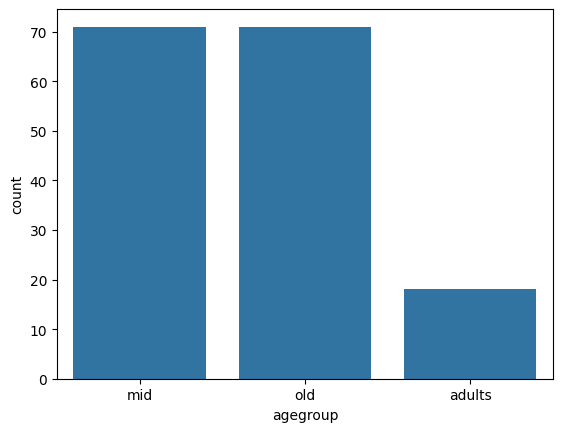

In [50]:
sn.barplot(data=chd_by_group)

<Axes: xlabel='agegroup', ylabel='ldl'>

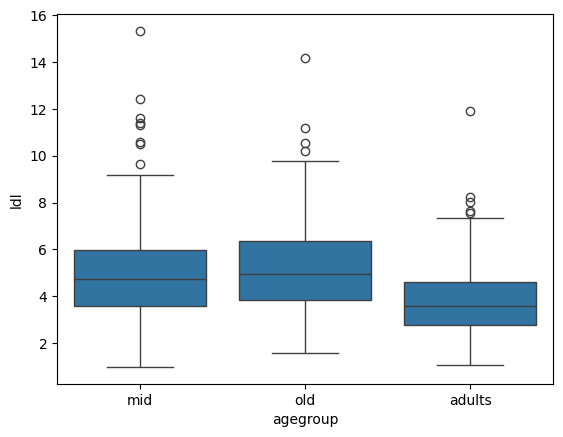

In [51]:
sn.boxplot(data=cDF,x='agegroup',y='ldl')